In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv("/content/twitter_multi_class_sentiment.csv")
dataset.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [6]:
dataset.isnull().sum()

,0
text,0
label,0
label_name,0


In [7]:
dataset.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [8]:
dataset['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [9]:
import matplotlib.pyplot as plt

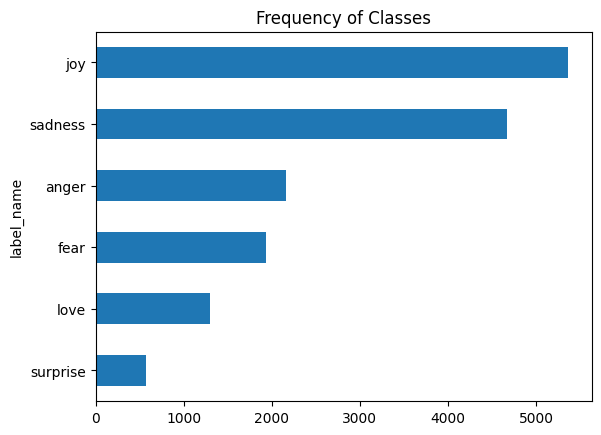

In [10]:
label_counts = dataset['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [11]:
dataset['words_per_tweet'] = dataset['text'].str.split().apply(len)

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

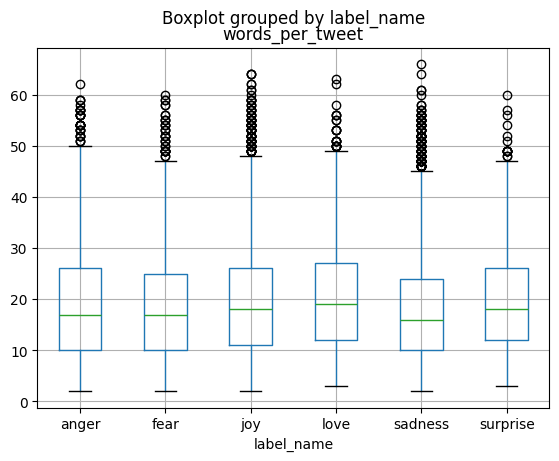

In [12]:
dataset.boxplot("words_per_tweet",by="label_name")

In [13]:
from transformers import AutoTokenizer

In [14]:
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
text = "I am learning all these tools! Very interesting"
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 1045, 2572, 4083, 2035, 2122, 5906, 999, 2200, 5875, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [16]:
len(tokenizer.vocab)

30522

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(dataset, test_size=0.3, stratify=dataset['label_name'])

In [19]:
train.head()

,text,label,label_name,words_per_tweet
4614,i have spent today feeling horribly unhappy,0,sadness,7
14298,i get that feeling of confidence is far more p...,1,joy,38
156,im certainly not going to sit and tell you wha...,5,surprise,40
6378,i have to move stop staring at the other ladie...,1,joy,19
6790,i actually prefer peep toe shoes because of it...,5,surprise,19


In [20]:
test, validation = train_test_split(test, test_size=1/3, stratify=test['label_name'])

In [21]:
train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [23]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.0 MB/s eta 0:00:00


In [24]:
from datasets import Dataset, DatasetDict

In [25]:
dataset = DatasetDict(
    {
        'train':Dataset.from_pandas(train, preserve_index=False),
        'test':Dataset.from_pandas(test, preserve_index=False),
        'validation':Dataset.from_pandas(validation, preserve_index=False),
    }
)

In [26]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 1600
    })
})

In [27]:
def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(dataset['train'][0])
print(tokenize(dataset['train'][0]))

{'text': 'i have spent today feeling horribly unhappy', 'label': 0, 'label_name': 'sadness', 'words_per_tweet': 7}
{'input_ids': [101, 1045, 2031, 2985, 2651, 3110, 27762, 12511, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [28]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [29]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [30]:
#label2id #id2label
label2id = {x['label_name']: x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

In [31]:
label2id

{'sadness': 0, 'joy': 1, 'surprise': 5, 'anger': 3, 'fear': 4, 'love': 2}

In [32]:
id2label

{0: 'sadness', 1: 'joy', 5: 'surprise', 3: 'anger', 4: 'fear', 2: 'love'}

In [33]:
from transformers import AutoModel
import torch

In [34]:
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [35]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [36]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [37]:
from transformers import AutoModelForSequenceClassification, AutoConfig

In [38]:
num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [40]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [41]:
from transformers import TrainingArguments

In [43]:
batch_size = 64
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    eval_strategy = "epoch",
    disable_tqdm = False
)

In [46]:
import evaluate

In [47]:
accuracy = evaluate.load("accuracy")

In [49]:
import numpy as np

def compute_metrics_evaluate(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [51]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {"accuracy":acc, "f1":f1}

In [52]:
from transformers import Trainer

In [54]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_encoded['train'],
                  eval_dataset=emotion_encoded['validation'],
                  tokenizer = tokenizer
                  )

<ipython-input-54-2470cba1671a>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [55]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amirerf1998 (amirerf) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.565221,0.829375,0.809481
2,No log,0.333972,0.898750,0.897189


TrainOutput(global_step=350, training_loss=0.7367452566964285, metrics={'train_runtime': 423.3655, 'train_samples_per_second': 52.909, 'train_steps_per_second': 0.827, 'total_flos': 897898722739200.0, 'train_loss': 0.7367452566964285, 'epoch': 2.0})

In [56]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.3210262358188629,
 'test_accuracy': 0.893125,
 'test_f1': 0.8910209901695936,
 'test_runtime': 16.2157,
 'test_samples_per_second': 197.34,
 'test_steps_per_second': 3.083}

In [59]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       933
           1       0.93      0.91      0.92      1072
           2       0.77      0.77      0.77       261
           3       0.91      0.89      0.90       432
           4       0.80      0.90      0.85       387
           5       0.92      0.48      0.63       115

    accuracy                           0.89      3200
   macro avg       0.87      0.82      0.83      3200
weighted avg       0.89      0.89      0.89      3200



In [62]:
label2id

{'sadness': 0, 'joy': 1, 'surprise': 5, 'anger': 3, 'fear': 4, 'love': 2}

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

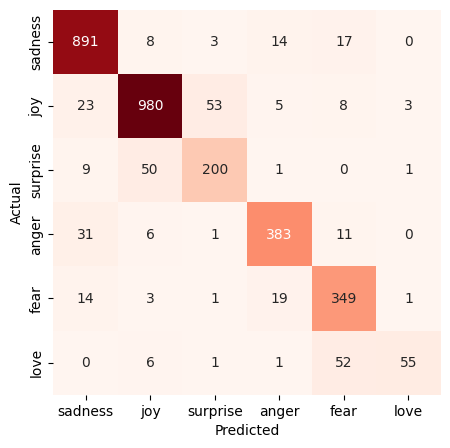

In [69]:
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [74]:
text = "I am having neck pain as i am doing this project but this too shall pass."

In [75]:
def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors='pt').to(device)
  input_encoded
  with torch.no_grad():
    outputs = model(**input_encoded)

  logits = outputs.logits
  pred = torch.argmax(logits,dim=1).item()
  return id2label[pred]

In [78]:
get_prediction(text)

'sadness'

In [79]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [84]:
from transformers import pipeline

In [85]:
classifier = pipeline('text-classification', model='/content/bert-base-uncased-sentiment-model')

Device set to use cuda:0


In [93]:
classifier([text, 'I will traveling this week', 'I feel bad for him'])

[{'label': 'sadness', 'score': 0.7835732102394104},
 {'label': 'joy', 'score': 0.7530996203422546},
 {'label': 'sadness', 'score': 0.9739478826522827}]

In [96]:
import zipfile
import os

def zip_folder(folder_path, output_zip):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the folder and add all files to the zip file
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Example usage
folder_path = '/content/bert-base-train-dir'  # replace with your folder path
output_zip = 'bert-base-train-dir.zip'  # replace with your desired output zip file name
zip_folder(folder_path, output_zip)

print(f"Folder '{folder_path}' has been zipped as '{output_zip}'.")


Folder '/content/bert-base-train-dir' has been zipped as 'bert-base-train-dir.zip'.
